In [1]:
import nilearn
from nibabel.testing import data_path
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
#import os
#import nibabel as nib
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
#import scipy.io as sio
#from nilearn.image import index_img
#from scipy.stats import ttest_ind
#import mvlearn
InteractiveShell.ast_node_interactivity = "all"
#import hcp_utils as hcp

In [2]:
dataset = datasets.fetch_atlas_schaefer_2018()
#dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels
labels = np.insert(labels, 0, 'Background')

In [3]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

In [4]:
from nilearn.interfaces import fmriprep
from nilearn.interfaces.fmriprep import load_confounds
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlations_control_z = []

subjects_control = ['53','54']

for subject in subjects_control:
    confounds_minimal_no_gsr, sample_mask = fmriprep.load_confounds(
    "/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
    strategy=["high_pass", "motion", "wm_csf", "global_signal"],
    motion="basic", wm_csf="basic", global_signal="basic")
    
    time_series = masker.fit_transform("/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
                                   confounds=confounds_minimal_no_gsr,
                                   sample_mask=sample_mask)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    correlation_matrix_z = np.arctanh(correlation_matrix)
    correlations_control_z.append(correlation_matrix_z)
    
    
mean_correlations_control_z = np.mean(correlations_control_z, axis=0)
mean_conn_control_standardized = np.tanh(mean_correlations_control_z)
np.fill_diagonal(mean_conn_control_standardized, 0)


/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_58253/741768136.py:20: RuntimeWarning: divide by zero encountered in arctanh
  correlation_matrix_z = np.arctanh(correlation_matrix)
/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_58253/741768136.py:20: RuntimeWarning: divide by zero encountered in arctanh
  correlation_matrix_z = np.arctanh(correlation_matrix)


In [5]:
subjects_mdd = ['03', '04','08']
correlations_mdd_z = []

for subject in subjects_mdd:
    confounds_minimal_no_gsr, sample_mask = fmriprep.load_confounds(
    "/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
    strategy=["high_pass", "motion", "wm_csf", "global_signal"],
    motion="basic", wm_csf="basic", global_signal="basic")
    
    time_series = masker.fit_transform("/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
                                   confounds=confounds_minimal_no_gsr,
                                   sample_mask=sample_mask)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    correlation_matrix_z = np.arctanh(correlation_matrix)
    correlations_mdd_z.append(correlation_matrix_z)
    
mean_correlations_mdd_z = np.mean(correlations_mdd_z, axis=0)
mean_conn_mdd_standardized = np.tanh(mean_correlations_mdd_z)
np.fill_diagonal(mean_conn_mdd_standardized, 0)


/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_58253/3174373204.py:14: RuntimeWarning: divide by zero encountered in arctanh
  correlation_matrix_z = np.arctanh(correlation_matrix)
/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_58253/3174373204.py:14: RuntimeWarning: divide by zero encountered in arctanh
  correlation_matrix_z = np.arctanh(correlation_matrix)
/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_58253/3174373204.py:14: RuntimeWarning: divide by zero encountered in arctanh
  correlation_matrix_z = np.arctanh(correlation_matrix)


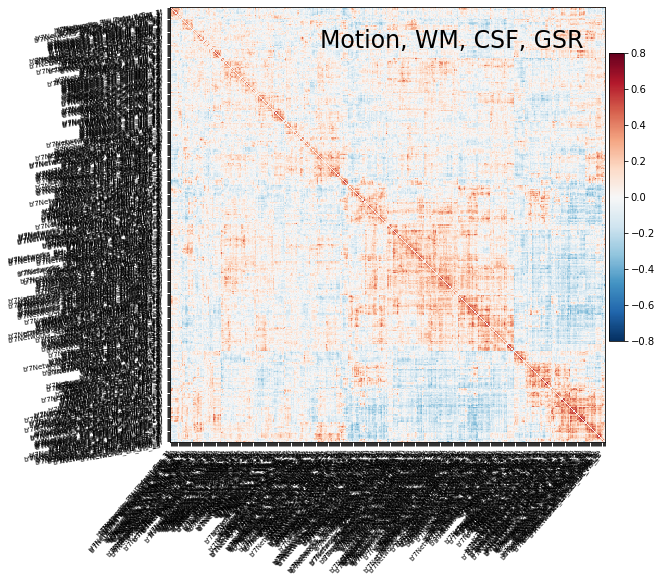

In [7]:
%matplotlib inline
plotting.plot_matrix(mean_conn_control_standardized, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='Motion, WM, CSF, GSR',
                     reorder=True)


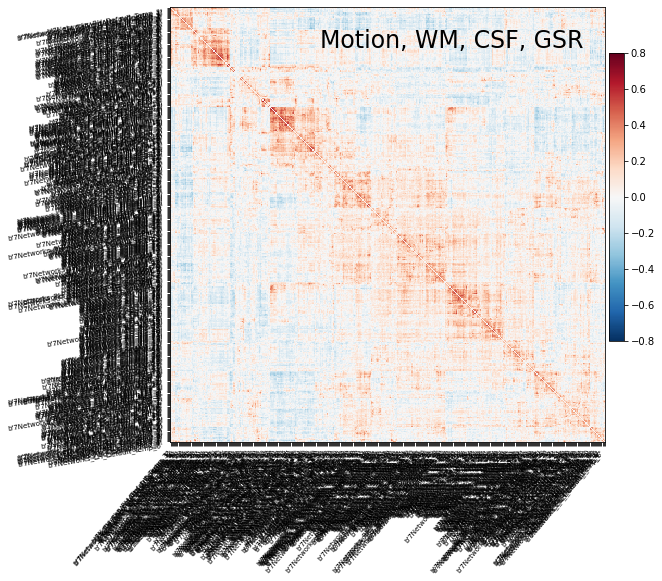

In [8]:
%matplotlib inline
plotting.plot_matrix(mean_conn_mdd_standardized, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='Motion, WM, CSF, GSR',
                     reorder=True)


In [6]:
from brainspace.gradient import GradientMaps
gm = GradientMaps(n_components=3, approach='dm', kernel='pearson', alignment = "procrustes")
#gm = GradientMaps(approach='dm', kernel='pearson', alignment = "procrustes")




In [7]:
from brainspace.datasets import load_parcellation
labeling = load_parcellation('schaefer', scale=400, join=True)


In [8]:
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
surf_lh, surf_rh = load_conte69()

In [9]:
gm.fit([mean_conn_control_standardized, mean_conn_mdd_standardized])

GradientMaps(alignment='procrustes', kernel='pearson', n_components=3)

In [10]:
from brainspace.utils.parcellation import map_to_labels
grad_control = [None] * 3
for i, g in enumerate(gm.aligned_[0].T):
    grad_control[i] = map_to_labels(g, labeling, mask=labeling != 0, fill=np.nan)

In [11]:
grad_mdd = [None] * 3
for i, g in enumerate(gm.aligned_[1].T):
    grad_mdd[i] = map_to_labels(g, labeling, mask=labeling != 0, fill=np.nan)

/Users/VictoriaShevchenko/opt/anaconda3/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


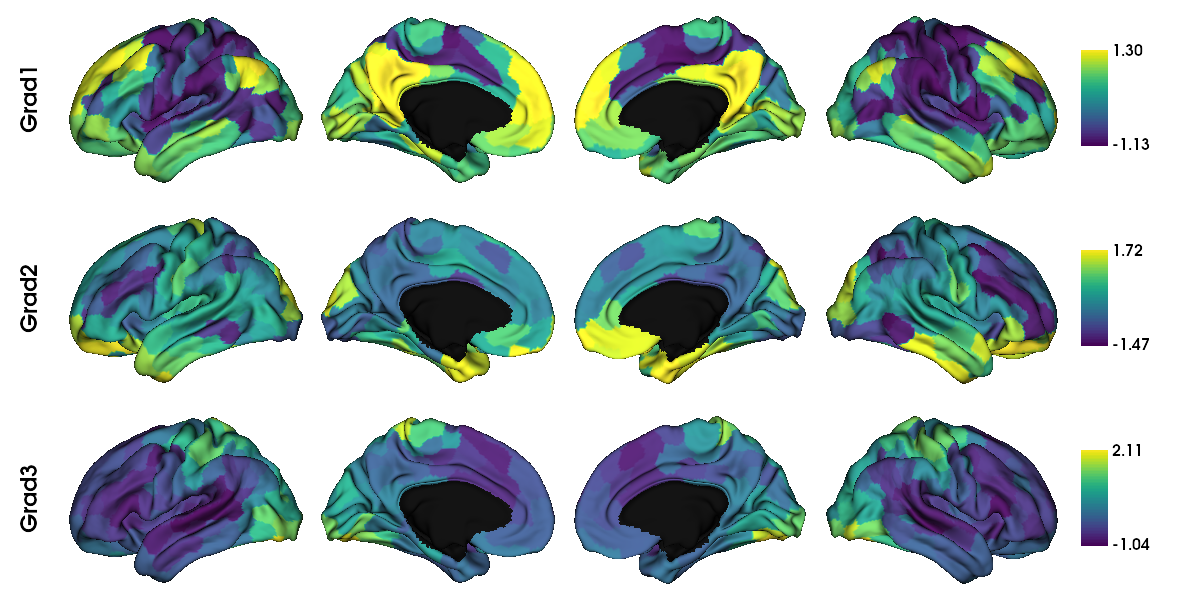

In [12]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad_control, size=(1200, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.5, embed_nb = True)


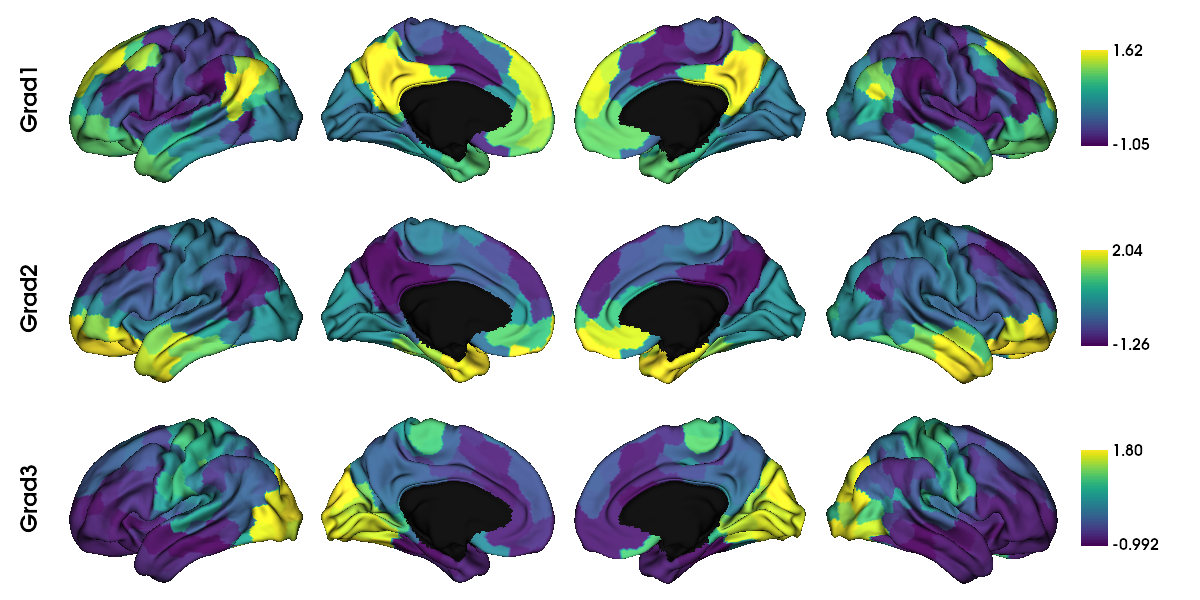

In [40]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad_mdd, size=(1200, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.5, embed_nb = True)


In [30]:
grad_control[0]

array([ 1.30728919, -0.76507457, -0.9374673 , ...,  0.73707701,
        0.73707701,  0.73707701])

In [34]:
grad_control_df = pd.DataFrame(np.array(grad_control).T, columns = ["Grad 1", "Grad 2", "Grad 3"])
grad_mdd_df = pd.DataFrame(np.array(grad_mdd).T, columns = ["Grad 1", "Grad 2", "Grad 3"])



<AxesSubplot:xlabel='Grad 2', ylabel='Grad 1'>

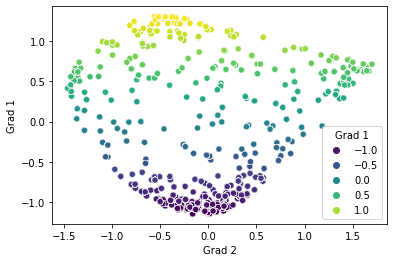

In [46]:
import seaborn as sns
sns.scatterplot(x = grad_control_df["Grad 2"], y = grad_control_df["Grad 1"], hue = grad_control_df["Grad 1"], palette = "viridis")


<AxesSubplot:xlabel='Grad 3', ylabel='Grad 1'>

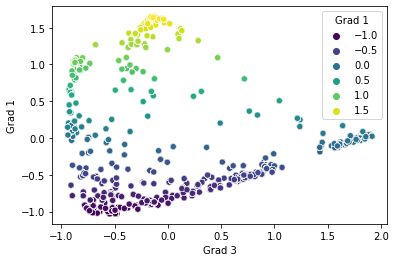

In [45]:
sns.scatterplot(x = grad_mdd_df["Grad 3"], y = grad_mdd_df["Grad 1"], hue = grad_mdd_df["Grad 1"], palette = "viridis")



ValueError: x and y must be the same size

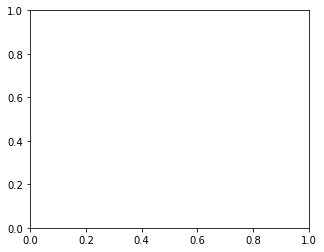

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(gm.lambdas_[0].size), gm.lambdas_)
ax.set_xlabel('Component Nb')
ax.set_ylabel('Eigenvalue')

plt.show()